In [2]:
import pandas as pd
import os
import matplotlib.pyplot as plt
from plotnine import *
from pathlib import Path
from tqdm import tqdm
import seaborn as sns
import numpy as np


data_folder = Path('../data') 
OCOD_history_path = data_folder / 'ocod_history_processed' 

list_of_files = list(OCOD_history_path.iterdir())



brexit_date = pd.to_datetime('2016-06-23')  # Brexit date
covid_date = pd.to_datetime('2020-03-23')   # First UK lockdown
ukraine_war_date = pd.to_datetime('2022-02-24')  # Start of Russia-Ukraine war

In [3]:
target_file = list_of_files[0]

target_year = pd.read_parquet(target_file)

In [4]:

total_residential_df = []
total_per_region_df =[]
total_per_class_df = []
total_incorp_df = []

for target_file in tqdm(list_of_files):

    target_year = pd.read_parquet(target_file)

    total_residential = target_year.loc[target_year['class2']=='residential'].groupby('nested_title').size().reset_index().rename(columns={0:'counts'})

    total_residential['filename'] = target_file.stem

    total_residential['date'] = pd.to_datetime(total_residential['filename'].str.split('_').str[-2] + '-' + 
                             total_residential['filename'].str.split('_').str[-1] + '-01')

    total_per_region = target_year.groupby(['region', 'class2']).size().reset_index().rename(columns={0:'counts'})

    total_per_region['filename'] = target_file.stem

    total_per_region['date'] = pd.to_datetime(total_per_region['filename'].str.split('_').str[-2] + '-' + 
                            total_per_region['filename'].str.split('_').str[-1] + '-01')
    """
    total_per_class = target_year.groupby('class2').size().reset_index().rename(columns={0:'counts'})

    total_per_class['filename'] = target_file.stem

    total_per_class['date'] = pd.to_datetime(total_per_class['filename'].str.split('_').str[-2] + '-' + 
                            total_per_class['filename'].str.split('_').str[-1] + '-01')
        total_per_class_df.append(total_per_class)
    """
    total_incorp = target_year.groupby('country_incorporated').size().reset_index().rename(columns={0:'counts'})

    total_incorp['filename'] = target_file.stem

    total_incorp['date'] = pd.to_datetime(total_incorp['filename'].str.split('_').str[-2] + '-' + 
                            total_incorp['filename'].str.split('_').str[-1] + '-01')

    total_residential_df.append(total_residential)

    total_per_region_df.append(total_per_region)

    total_incorp_df.append(total_incorp)

total_residential_df = pd.concat(total_residential_df, ignore_index = True)
total_per_region_df = pd.concat(total_per_region_df, ignore_index = True)
#total_per_class_df = pd.concat(total_per_class_df, ignore_index = True)
total_incorp_df = pd.concat(total_incorp_df, ignore_index = True)

  0%|          | 0/99 [00:00<?, ?it/s]

100%|██████████| 99/99 [00:22<00:00,  4.35it/s]


/tmp/ipykernel_1992/2905475633.py:7: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/plotnine/ggplot.py:615: PlotnineWarning: Saving 6.4 x 4.8 in image.
/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/plotnine/ggplot.py:616: PlotnineWarning: Filename: figures/total_properties.png


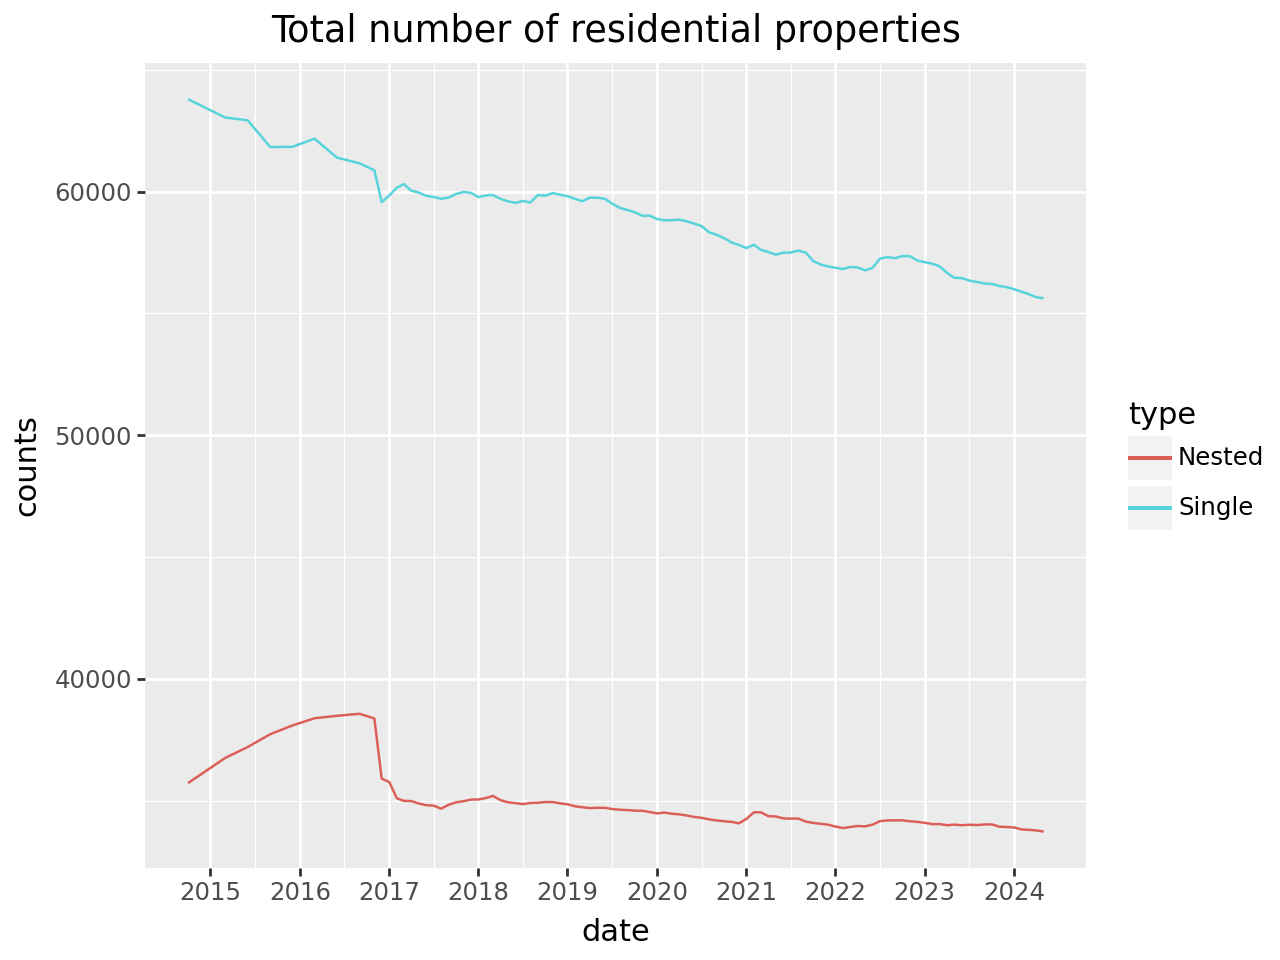

In [34]:

total_residential_df['type'] = np.where(total_residential_df['nested_title'], 'Nested', 'Single')

p = ggplot(total_residential_df, aes(x = 'date', 
y = 'counts', 
color = 'type') )+ geom_line() + labs(
    title = "Total number of residential properties") +   scale_x_date(
     breaks=pd.date_range(start=total_residential_df['date'].min(), end=total_residential_df['date'].max(), freq='Y'),
     date_labels='%Y'  # Format to show only year
 )

p.save(filename = 'figures/total_properties.png')

p

/tmp/ipykernel_1992/1175084525.py:5: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/plotnine/ggplot.py:615: PlotnineWarning: Saving 6.4 x 4.8 in image.
/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/plotnine/ggplot.py:616: PlotnineWarning: Filename: figures/properties_by_region.png


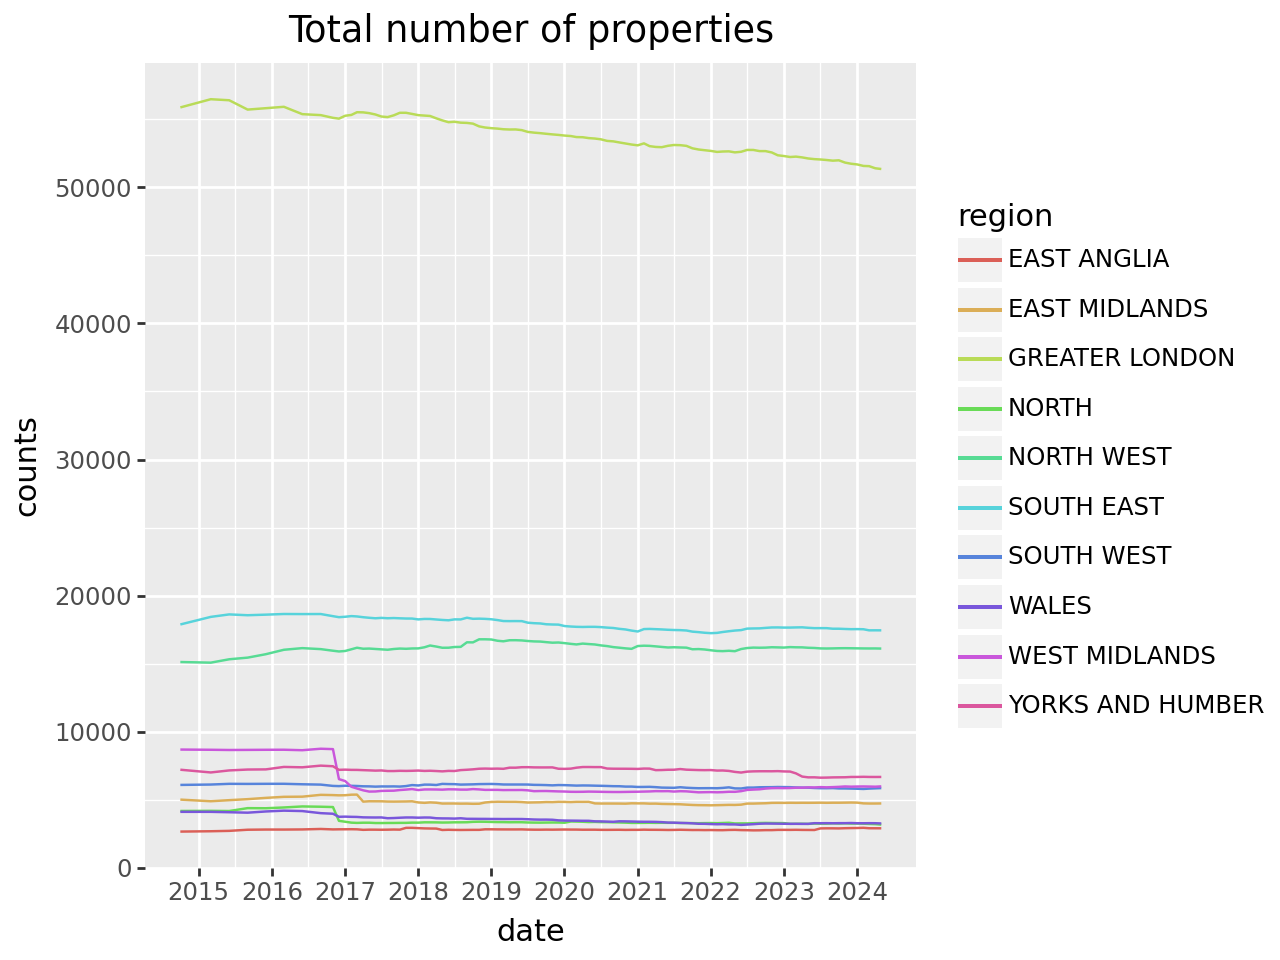

In [10]:

p = ggplot(total_per_region_df.groupby(['region', 'date'])['counts'].sum().reset_index(), aes(x='date', y='counts', color='region')) + \
    geom_line() + \
    labs(title="Total number of properties") + \
    scale_x_date(
        breaks=pd.date_range(start=total_residential_df['date'].min(), end=total_residential_df['date'].max(), freq='Y'),
        date_labels='%Y'
    ) 

p.save(filename = 'figures/properties_by_region.png')

p

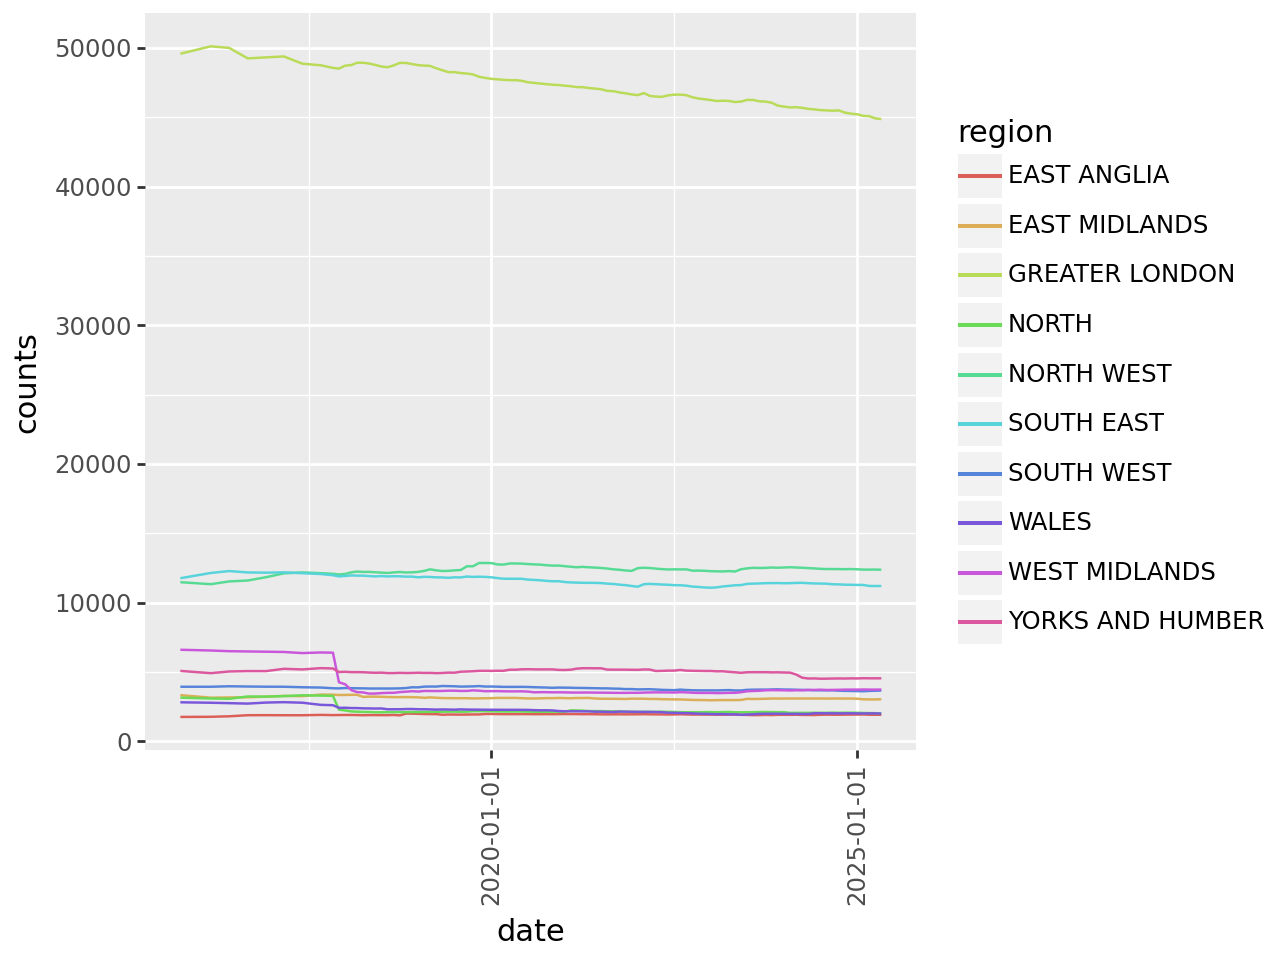

In [31]:
p = ggplot(total_per_region_df.loc[total_per_region_df['class2']=='residential'], aes( x = 'date', y = 'counts', colour = 'region')) + geom_line() + \
         theme(
        axis_text_x=element_text(angle=90),
    )


p

/tmp/ipykernel_1909/3009902570.py:5: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/plotnine/ggplot.py:615: PlotnineWarning: Saving 6.4 x 4.8 in image.
/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/plotnine/ggplot.py:616: PlotnineWarning: Filename: figures/properties_by_class.png


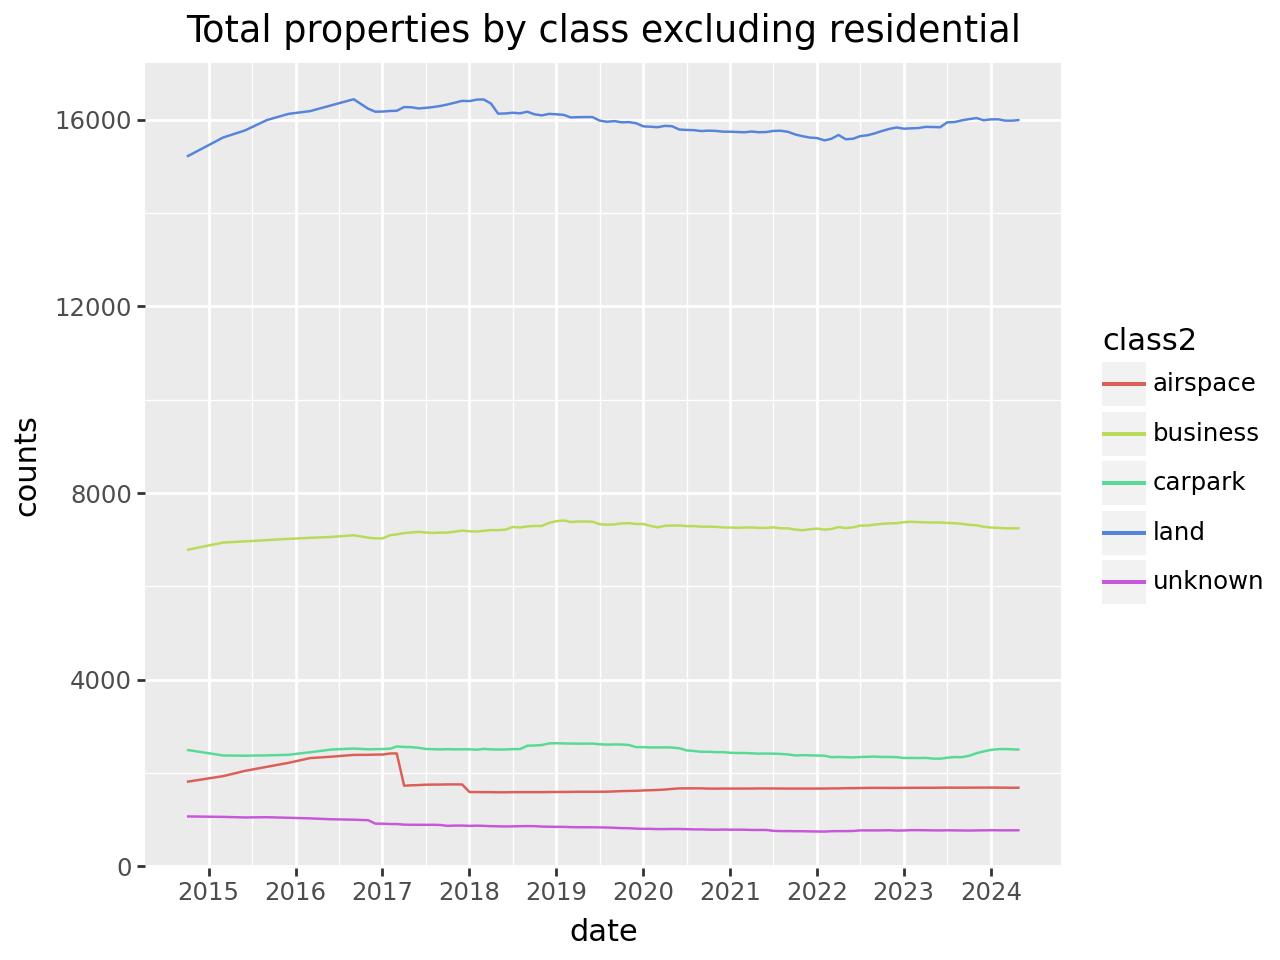

In [5]:
p = ggplot(total_per_class_df.loc[total_per_class_df['class2']!='residential'], aes(x = 'date', 
y = 'counts', 
color = 'class2') )+ geom_line() + labs(
    title = "Total properties by class excluding residential") +   scale_x_date(
     breaks=pd.date_range(start=total_residential_df['date'].min(), end=total_residential_df['date'].max(), freq='Y'),
     date_labels='%Y'  # Format to show only year
 )

p.save(filename = 'figures/properties_by_class.png')

p

In [44]:
total_incorp_df['country_incorporated'] = total_incorp_df['country_incorporated'].str.replace("BRITISH VIRGIN ISLANDS", "BVI")

# Step 1: Calculate total counts per country across all years
country_totals = total_incorp_df.groupby('country_incorporated')['counts'].mean()

# Step 2: Get the top 10 countries
top_10_countries = country_totals.nlargest(20).index

# Step 3: Filter the original dataframe to only include top 10 countries
filtered_df = total_incorp_df[total_incorp_df['country_incorporated'].isin(top_10_countries)]

print("Top 10 countries by total counts:")
print(country_totals.nlargest(20))

Top 10 countries by total counts:
country_incorporated
JERSEY              27341.353535
BVI                 26124.949495
GUERNSEY            19601.242424
ISLE OF MAN         13120.525253
GIBRALTAR            3683.525253
LUXEMBOURG           3043.131313
SINGAPORE            2084.929293
IRELAND              1962.414141
HONG KONG            1859.090909
PANAMA               1830.333333
CAYMAN ISLANDS       1684.171717
SEYCHELLES           1596.939394
NETHERLANDS          1557.737374
CYPRUS               1408.171717
BAHAMAS              1380.626263
MAURITIUS            1087.818182
GERMANY               909.616162
AUSTRALIA             792.727273
BERMUDA               668.939394
DELAWARE, U.S.A.      668.838384
Name: counts, dtype: float64


/tmp/ipykernel_1909/1286059234.py:6: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/plotnine/ggplot.py:615: PlotnineWarning: Saving 6.4 x 4.8 in image.
/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/plotnine/ggplot.py:616: PlotnineWarning: Filename: figures/properties_by_incorporation.png


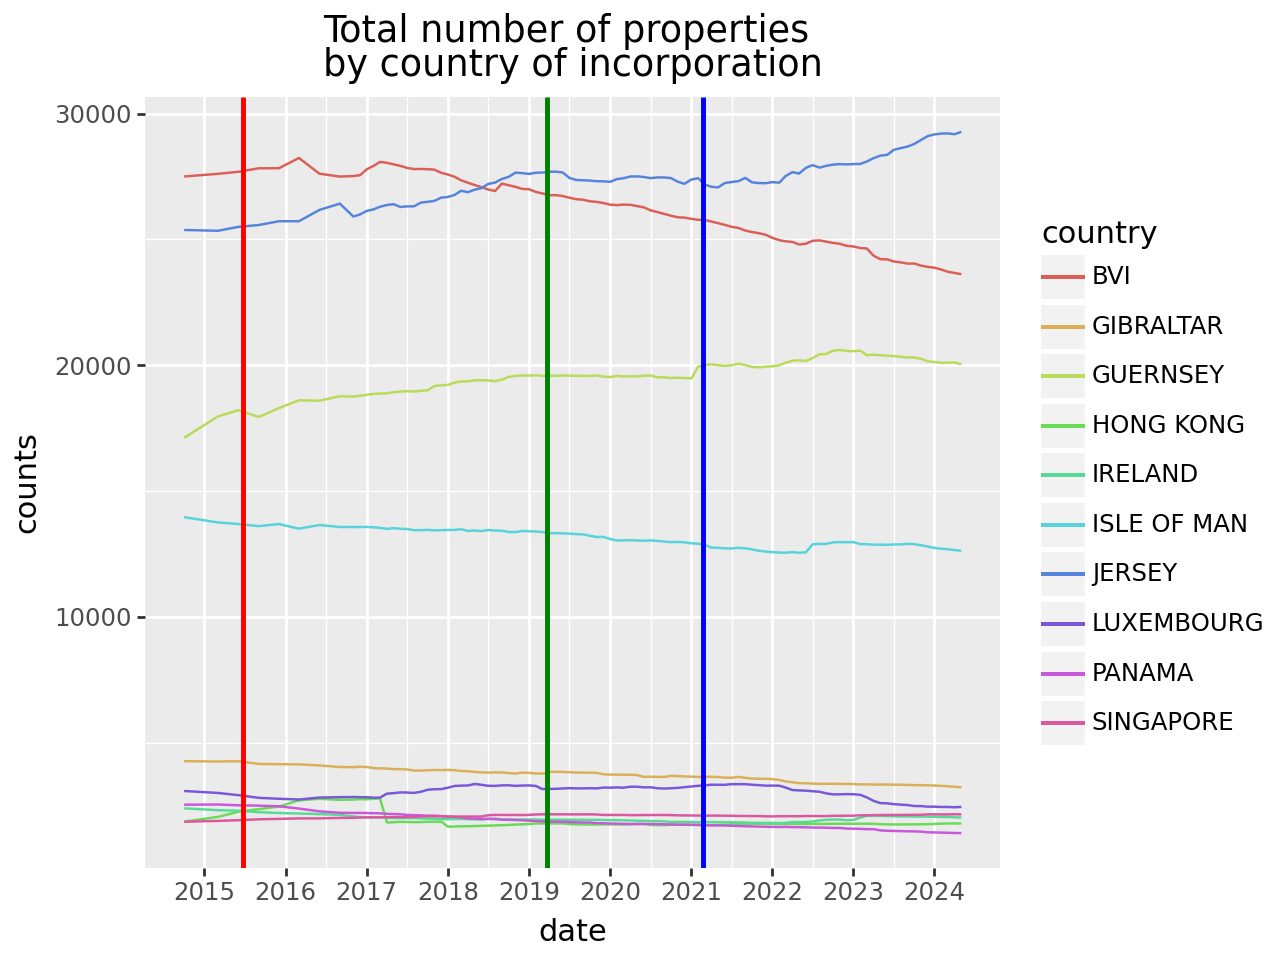

In [24]:
p = ggplot(filtered_df, aes(x = 'date', 
y = 'counts', 
color = 'country_incorporated') )+ geom_line() + labs(
    title = "Total number of properties\nby country of incorporation",
    ) +   scale_x_date(
     breaks=pd.date_range(start=filtered_df['date'].min(), end=filtered_df['date'].max(), freq='Y'),
     date_labels='%Y'  # Format to show only year
 ) + \
  guides(color = guide_legend(title = "country")) +\
    geom_vline(xintercept=brexit_date, color='red',  size=1) + \
    geom_vline(xintercept=covid_date, color='green', size=1) + \
    geom_vline(xintercept=ukraine_war_date, color='blue', size=1)

p.save(filename = 'figures/properties_by_incorporation.png')

p


In [30]:
test = total_incorp_df.copy()

test['diff'] = (test['counts'] - test.groupby('country_incorporated')['counts'].shift())/test.groupby('country_incorporated')['counts'].shift()

test

,country_incorporated,counts,filename,date,diff
0,00002065,4,OCOD_FULL_2015_10,2015-10-01,NaN
1,0003280,1,OCOD_FULL_2015_10,2015-10-01,NaN
2,02127156,1,OCOD_FULL_2015_10,2015-10-01,NaN
3,02366665,1,OCOD_FULL_2015_10,2015-10-01,NaN
4,05986778,1,OCOD_FULL_2015_10,2015-10-01,NaN
...,...,...,...,...,...
21390,"WASHINGTON, U.S.A.",9,OCOD_FULL_2025_05,2025-05-01,0.0
21391,WESTERN SAMOA,2,OCOD_FULL_2025_05,2025-05-01,0.0
21392,"WISCONSIN, U.S.A.",4,OCOD_FULL_2025_05,2025-05-01,0.0
21393,"WYOMING, U.S.A.",23,OCOD_FULL_2025_05,2025-05-01,0.0


/tmp/ipykernel_1909/2274838052.py:6: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/plotnine/geoms/geom_path.py:100: PlotnineWarning: geom_path: Removed 1 rows containing missing values.


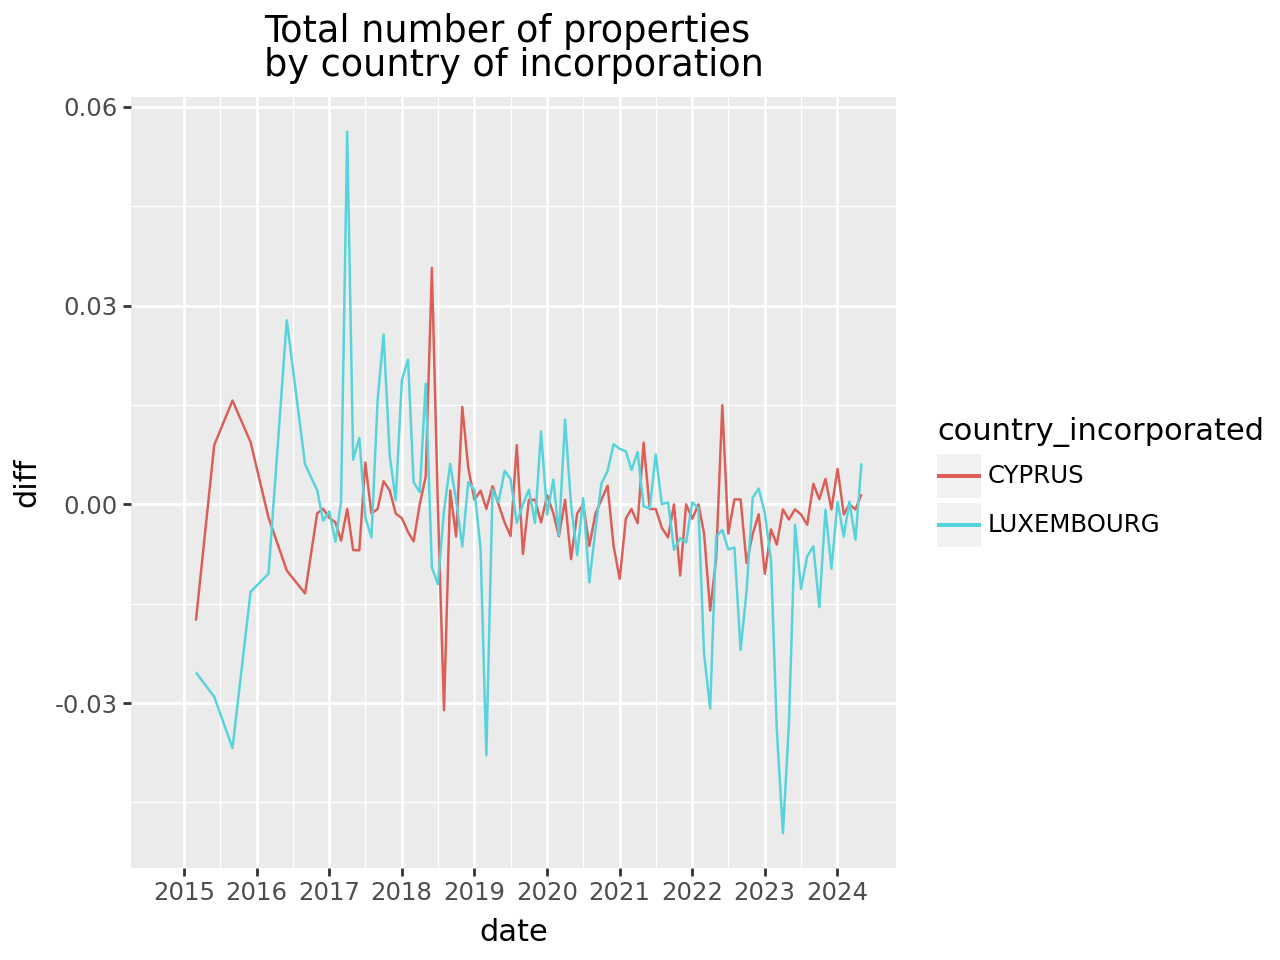

In [41]:
p = ggplot(test[test['country_incorporated'].isin(['LUXEMBOURG', 'CYPRUS'])], aes(x = 'date', 
y = 'diff', 
color = 'country_incorporated') )+ geom_line() + labs(
    title = "Total number of properties\nby country of incorporation",
    ) +   scale_x_date(
     breaks=pd.date_range(start=test['date'].min(), end=test['date'].max(), freq='Y'),
     date_labels='%Y'  # Format to show only year
 ) 

p

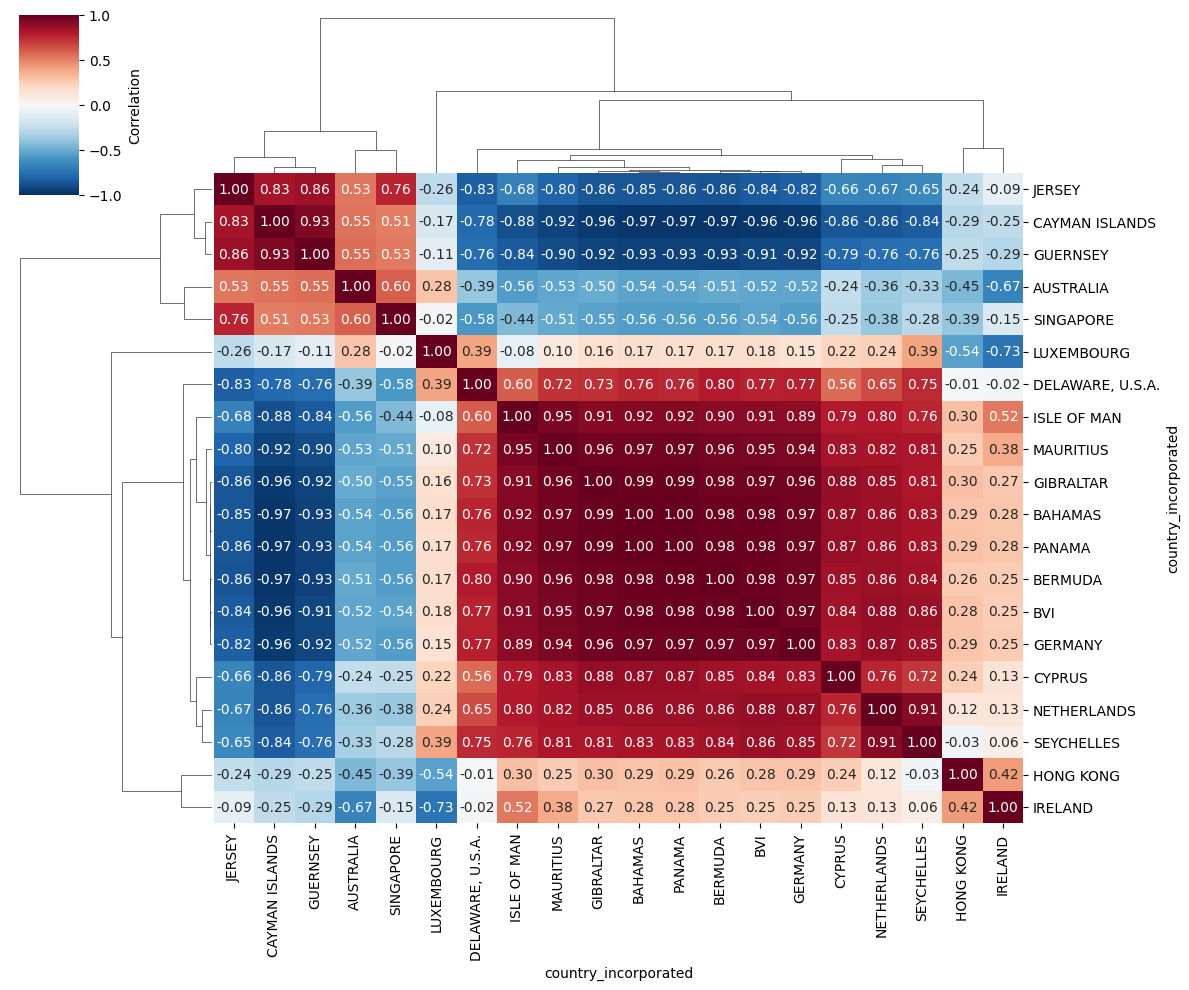

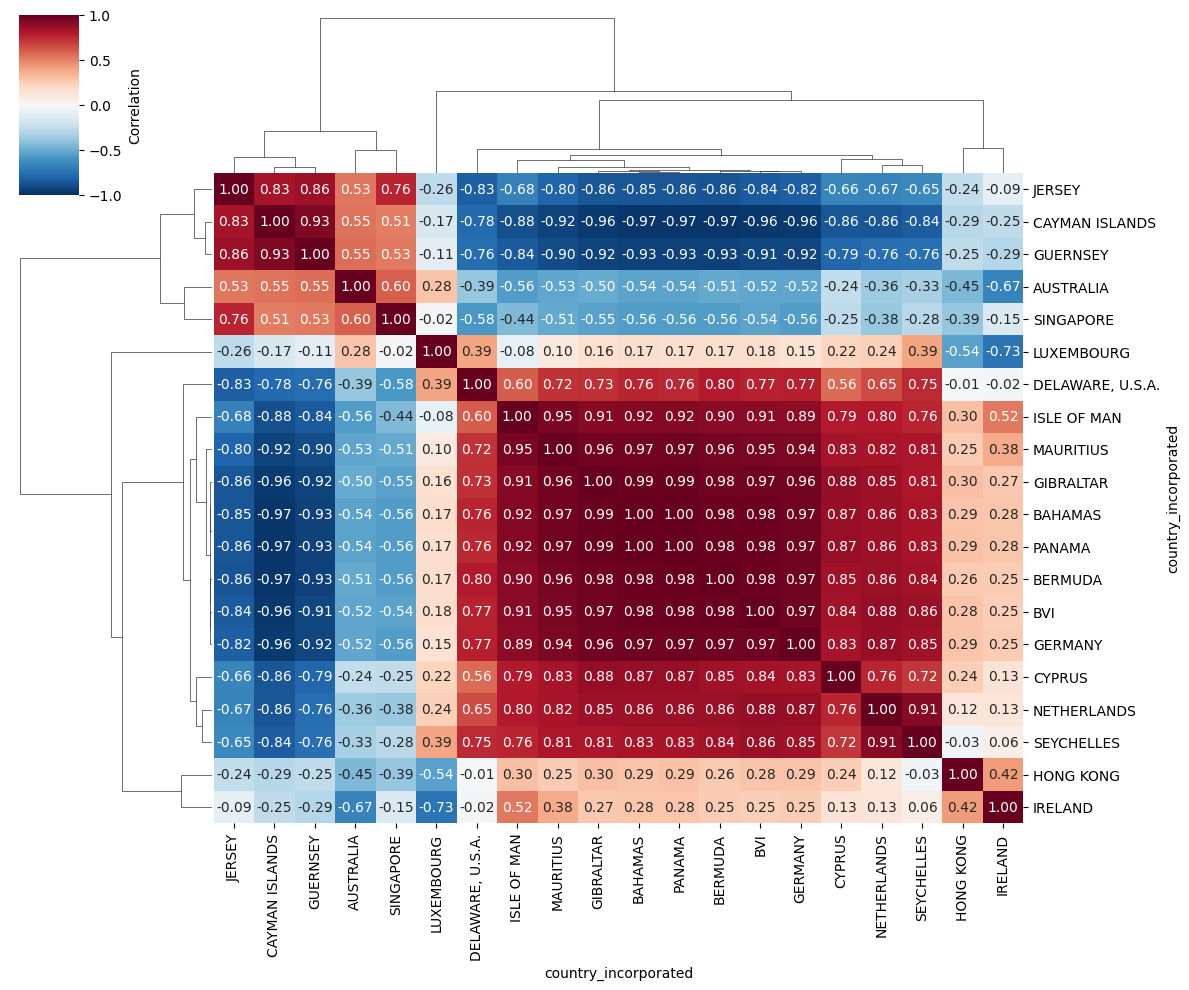

In [73]:
sns.clustermap(

    data=filtered_df.pivot(index='date', columns='country_incorporated', values='counts').corr(method = 'spearman'),
    
    # Clustering options
    method='average',        # linkage method: 'single', 'complete', 'average', 'weighted', 'centroid', 'median', 'ward'
    metric='euclidean',      # distance metric
    
    # Appearance options
    cmap='RdBu_r',          # colormap
    center=0,               # center point for colormap
    vmin=-1, vmax=1,        # value range for correlation

    # Size and layout
    figsize=(12, 10),
    
    # Annotations
    annot=True,             # show correlation values
    fmt='.2f',              # format for annotations
    # Dendrogram options
    row_cluster=True,       # cluster rows
    col_cluster=True,       # cluster columns

    # Color bar
    cbar_kws={'label': 'Correlation'}
)
plt.savefig('figures/incorporation_corr.png')
plt.show()